# 0. Veri Setinin Hazırlanması
Veri Seti ve Adresi:

Steam Games, Reviews, and Rankings. : https://www.kaggle.com/datasets/mohamedtarek01234/steam-games-reviews-and-rankings

In [1]:
# Kullanacağımız kütüphaneleri yükleyelim.
import numpy as np 
import pandas as pd 

# Görselleştirme için kullanacağım kütüphaneler
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/steam-games-reviews-and-rankings/steam_game_reviews.csv
/kaggle/input/steam-games-reviews-and-rankings/games_ranking.csv
/kaggle/input/steam-games-reviews-and-rankings/games_description.csv


In [2]:
# Veri setini notebook içerisine dahil edelim, ham datanin da elimizde bulunmasi icin bir kopyasini aliyoruz.

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/steam-games-reviews-and-rankings/steam_game_reviews.csv", low_memory = False)
df = df_.copy()

In [3]:
# İleride join islemleri yapabilmek icin verisetimde bulunan diger tabloyu da notebook içerisine dahil edelim, ham datanin da elimizde bulunmasi icin bir kopyasini aliyoruz.

df2_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/steam-games-reviews-and-rankings/games_ranking.csv")
df2 = df2_.copy()

In [4]:
# İleride join islemleri yapabilmek icin verisetimde bulunan diger tabloyu da notebook içerisine dahil edelim, ham datanin da elimizde bulunmasi icin bir kopyasini aliyoruz.

df3_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/steam-games-reviews-and-rankings/games_description.csv")
df3 = df3_.copy()

## 0.1 İlgili Veri Tablolarının Merge Edilmesi 

In [5]:
#merged_table = pd.merge(df, df2, on="game_name", how="inner") eski version
# kullanmak istedigim 2 tablomu merge ediyorum, inner join tercih ediyorum zaten 2 sütunum uygun
finaldf = pd.merge(df2, df3, left_on="game_name", right_on="name", how="inner")

In [6]:
# oyun adını kullanarak 3 tablomuzu birleştirdiğimiz final df
#finaldf = pd.merge(merged_table, df3, left_on="game_name", right_on="name", how="inner")
# yeni versionda eski merged_table yeni finaldf olacak

## 0.2 Eksik Veri Oluşturulması

In [7]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.02,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    finaldf_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    finaldf_size = dataframe.size
    num_missing = int(finaldf_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        finaldf_missing.iat[row_idx, col_idx] = np.nan
        
    return finaldf_missing

finaldf = add_random_missing_values(dataframe = finaldf,
                               missing_rate = 0.03)

# 1. Veriye İlk Bakış

In [8]:
# Veri setimden elde ettigim dataframelerimin ilk 3 gözlemini görelim.
# Simdilik bu tablonun review sütununu detaylica kullanmayi düsünmüyorum, ileride ML calismalari yaparken analizime
# dahil edip sentiment analysis veya Keyword analysis gibi projelerimde kullanabilecegimi, bu sayede
# hem kendimi gelistirirken hem de calismamin boyutunun, detayının artacagini düşünüyorum.
df.head(n = 3)

,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,"1,152",13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account


In [9]:
df2.head(n = 5)

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2
2,Cyberpunk 2077,Action,Sales,3
3,Black Myth: Wukong,Action,Sales,4
4,ELDEN RING,Action,Sales,5


In [10]:
df3.head(n = 5)

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


In [11]:
# Sondan 3 gözlem için tail() metodu kullanılabilirİZ.
#df.tail(3)

In [12]:
#merged_table.head(1)

In [13]:
finaldf.head(5)

,game_name,genre,rank_type,rank,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Counter-Strike 2,Action,Sales,1.0,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",NaN,['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2.0,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
2,Cyberpunk 2077,Action,Sales,3.0,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
3,Black Myth: Wukong,Action,Sales,4.0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",NaN,['Requires a 64-bit processor and operating sy...,NaN,['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
4,ELDEN RING,Action,Sales,5.0,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


In [14]:
# Veri setindeki satır ve sütun sayılarını .shape kullanarak görebiliriz, sirasiyla tablolarimiza bakalim
df.shape # -> (satır, sütun)

(992153, 8)

In [15]:
df2.shape

(672, 4)

In [16]:
df3.shape

(290, 13)

In [17]:
finaldf.shape

(656, 17)

In [18]:
# Veri setindeki kolonları yazdırdım.
print(list(finaldf.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısısına bakalım.
print(f"Veri seti içerisinde toplam {len(finaldf.columns)} kolon vardır.\n")

# Kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğüne bakalım.
print(f"df.columns'un döndüğü veri tipi: {type(finaldf.columns)}\n")

['game_name', 'genre', 'rank_type', 'rank', 'name', 'short_description', 'long_description', 'genres', 'minimum_system_requirement', 'recommend_system_requirement', 'release_date', 'developer', 'publisher', 'overall_player_rating', 'number_of_reviews_from_purchased_people', 'number_of_english_reviews', 'link'] 

Veri seti içerisinde toplam 17 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [19]:
#info() metodunu kullanarak, veri setine ait yapısal bilgilere ulaşıp, veri tiplerinin doğru olup olmadığını, kayıt sayılarını, kolon isimlerini kontrol ettim
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                637 non-null    object 
 1   genre                                    634 non-null    object 
 2   rank_type                                633 non-null    object 
 3   rank                                     637 non-null    float64
 4   name                                     641 non-null    object 
 5   short_description                        622 non-null    object 
 6   long_description                         632 non-null    object 
 7   genres                                   630 non-null    object 
 8   minimum_system_requirement               632 non-null    object 
 9   recommend_system_requirement             637 non-null    object 
 10  release_date                             634 non-n

In [20]:
# değişkenleri görmek ve tiplerini görüntülemek istersek, dtypes kullanabiliriz.
finaldf.dtypes

game_name                                   object
genre                                       object
rank_type                                   object
rank                                       float64
name                                        object
short_description                           object
long_description                            object
genres                                      object
minimum_system_requirement                  object
recommend_system_requirement                object
release_date                                object
developer                                   object
publisher                                   object
overall_player_rating                       object
number_of_reviews_from_purchased_people     object
number_of_english_reviews                   object
link                                        object
dtype: object

In [21]:
print(finaldf.columns.tolist())

['game_name', 'genre', 'rank_type', 'rank', 'name', 'short_description', 'long_description', 'genres', 'minimum_system_requirement', 'recommend_system_requirement', 'release_date', 'developer', 'publisher', 'overall_player_rating', 'number_of_reviews_from_purchased_people', 'number_of_english_reviews', 'link']


In [22]:
# Çevrilecek sütunlar
columns_to_convert = [
    "number_of_english_reviews"
]
#"number_of_reviews_from_purchased_people", "overall_player_rating" icin temizleme duzeltme gerekecek.

# Sütunları float'a dönüştürme
# Eğer sütunlar içinde sayısal olmayan değerler varsa, errors="coerce" parametresiyle bu değerler NaN (eksik veri) olarak atanır.
for column in columns_to_convert:
    finaldf[column] = pd.to_numeric(finaldf[column], errors="coerce")

# Dönüşüm sonrası NaN değerleri kontrol etme
print(finaldf[columns_to_convert].info())

# NaN değerlerini doldurmak asagidaki kod kullanilabilir icin:
# finaldf[columns_to_convert] = finaldf[columns_to_convert].fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number_of_english_reviews  51 non-null     float64
dtypes: float64(1)
memory usage: 5.2 KB
None


Elimizdeki veri setinde kategorik ve numerik özellikler birlikte bulunmakta. Bu özellikleri ayırmak ve farklı değişken listelerinde kullanmak bizim için faydalı olabilir, özellikle kolon bazlı işlemler yapmak istersek bu listeleri bir filtre olarak kullanabiliriz.

In [23]:
categorical_features = []
numerical_features = []

for col in finaldf.columns:
    if (finaldf[col].dtype == "object") or (finaldf[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [24]:
finaldf.describe().T # -> .T eklentisi elde edeceğimiz çıktıyı transpose eder.

# df.describe(include = "all") -> Veri setindeki tüm değişkenleri dahil etmek için include parametresine "all" değerini verebilirsiniz.
# Veri setimizin betimsel istatistiklerine ulaşmak için describe() fonksiyonunu kullanıyoruz.
# Bu fonksiyon eksik verileri göz ardı eder ve default olarak yalnızca numerik değişkenlere bakar.

,count,mean,std,min,25%,50%,75%,max
rank,637.0,19.725275,11.455336,1.0,10.0,19.0,30.0,40.0
number_of_english_reviews,51.0,444.058824,337.264668,0.0,143.0,380.0,761.5,998.0


# 2. Eksik Veri Analizi

Eksik Veri Analizi ile, veri setimizdeki eksik verileri tespit edip bu durumu uygun bir şekilde düzeltmeyi hedefleriz.

Veri seti içerisinde eksik değerler bulunması yapısal bir bozukluğa işaret eder ve mutlaka uygun yöntemlerle ele alınmalıdır.

Eksik veriler, duruma bağlı olarak veri setinden silinebilir veya uygun veriler ile doldurulabilir. Ancak eksik verilerin silinmesi, silinen satır veya sütunlar içerisinde yer alan diğer verilerin kaybedilmesi anlamına gelir. Eksik verilerin doldurulması işleminde ise, veri setine sentetik bir girdi yapacağımızdan dolayı, doldurma işlemleri veri setindeki dağılımları manipüle edebilir (veri setinde yanlılık oluşturabilir).

Eksik verilerin ne sebeple ortaya çıktığı hassas bir şekilde değerlendirilmeli, nasıl ele alınacağı da bu değerlendirme sonucunda uygun şekilde karar verilmelidir.

## 2.1 Eksik Verilerin Gözlemlenmesi

In [25]:
finaldf.isna().sum() # -> isna() methodu yerine isnull() methodu da kullanılabilir.

game_name                                   19
genre                                       22
rank_type                                   23
rank                                        19
name                                        15
short_description                           34
long_description                            24
genres                                      26
minimum_system_requirement                  24
recommend_system_requirement                19
release_date                                22
developer                                   10
publisher                                   13
overall_player_rating                       29
number_of_reviews_from_purchased_people     24
number_of_english_reviews                  605
link                                        13
dtype: int64

Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz.

In [26]:
finaldf.isna().sum().sum()

941

In [27]:
# Eksik olmayan değerlerin sayısı
finaldf.notnull().sum()

game_name                                  637
genre                                      634
rank_type                                  633
rank                                       637
name                                       641
short_description                          622
long_description                           632
genres                                     630
minimum_system_requirement                 632
recommend_system_requirement               637
release_date                               634
developer                                  646
publisher                                  643
overall_player_rating                      627
number_of_reviews_from_purchased_people    632
number_of_english_reviews                   51
link                                       643
dtype: int64

In [28]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {finaldf.notnull().sum().sum()} adet eksik olmayan, {finaldf.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 10211 adet eksik olmayan, 941 eksik gözlem var.


In [29]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
finaldf[finaldf.isnull().any(axis = 1)]

,game_name,genre,rank_type,rank,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Counter-Strike 2,Action,Sales,1.0,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",NaN,['Valve'],['Valve'],Very Positive,"(8,313,603)",NaN,https://store.steampowered.com/app/730/Counter...
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2.0,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time",NaN,https://store.steampowered.com/app/2183900/War...
2,Cyberpunk 2077,Action,Sales,3.0,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)",NaN,https://store.steampowered.com/app/1091500/Cyb...
3,Black Myth: Wukong,Action,Sales,4.0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",NaN,['Requires a 64-bit processor and operating sy...,NaN,['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)",NaN,https://store.steampowered.com/app/2358720/Bla...
4,ELDEN RING,Action,Sales,5.0,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)",NaN,https://store.steampowered.com/app/1245620/ELD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,Golf Peaks,Sports & Racing,Review,34.0,Golf Peaks,A relaxing puzzle game where you climb mountai...,About This Game\nGolf Peaks is a chill puzzle ...,"['Card Game', 'Strategy', 'Sports', 'Casual', ...",NaN,"['OS: Windows 10', 'Processor: i5', 'Memory: 4...","13 Nov, 2018",['Afterburn'],['Afterburn'],Overwhelmingly Positive,(658),354.0,https://store.steampowered.com/app/923260/Golf...
650,PIPE by BMX Streets,Sports & Racing,Review,35.0,PIPE by BMX Streets,PIPE is a physics based BMX experience built f...,About This Game\n\t\t\t\t\t\t\tPIPE is a physi...,"['Sports', 'Simulation', 'Indie', 'BMX', 'Bike...","['OS *: Windows 7', 'Processor: X64 Dual Core'...","['OS *: Windows 7', 'Processor: X64 Dual Core'...","15 Mar, 2018",NaN,['Mash Games'],Very Positive,NaN,NaN,https://store.steampowered.com/app/815780/PIPE...
653,Ride 2,Sports & Racing,Review,38.0,Ride 2,The fastest and most iconic bikes in the world...,About This Game\n\t\t\t\t\t\t\tWelcome to the ...,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,"7 Oct, 2016",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,"(86% of 2,335) All Time",NaN,https://store.steampowered.com/app/477770/Ride...
654,Tanuki Sunset,Sports & Racing,Review,NaN,Tanuki Sunset,Master the longboard as you drift through stun...,About This Game\nGrab Your Longboard and Race ...,"['Racing', 'Action', 'Indie',

In [30]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
finaldf[finaldf.notnull().all(axis = 1)][:5]

,game_name,genre,rank_type,rank,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
223,UFO 50,Role-Playing,Sales,21.0,UFO 50,UFO 50 is a collection of 50 single and multip...,About This Game\nUFO 50 is a collection of 50 ...,"['Indie', 'Action', 'Pixel Graphics', 'Retro',...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"18 Sep, 2024",['Mossmouth'],['Mossmouth'],Very Positive,(94% of 843) All Time,809.0,https://store.steampowered.com/app/1147860/UFO...
263,UFO 50,Role-Playing,Revenue,37.0,UFO 50,UFO 50 is a collection of 50 single and multip...,About This Game\nUFO 50 is a collection of 50 ...,"['Indie', 'Action', 'Pixel Graphics', 'Retro',...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"18 Sep, 2024",['Mossmouth'],['Mossmouth'],Very Positive,(94% of 843) All Time,809.0,https://store.steampowered.com/app/1147860/UFO...
264,Visions of Mana,Role-Playing,Revenue,38.0,Visions of Mana,Explore a world of elemental spirits and adven...,About This Game\n\t\t\t\t\t\t\tVisions of Mana...,"['RPG', 'JRPG', 'Party-Based RPG', 'Action RPG...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"29 Aug, 2024",['Square Enix'],['Square Enix'],Very Positive,"(81% of 1,171) All Time",776.0,https://store.steampowered.com/app/2490990/Vis...
329,EA SPORTS™ Madden NFL 25,Simulation,Sales,23.0,EA SPORTS™ Madden NFL 25,Hit like you mean it with FieldSENSE™ powered ...,About This Game\nFRANCHISE IMMERSIONRecharged ...,"['Simulation', 'Strategy', 'Football (American...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"15 Aug, 2024",['Tiburon'],['Electronic Arts'],Mixed,(865),949.0,https://store.steampowered.com/app/2582560/EA_...
333,Shawarma Legend,Simulation,Sales,27.0,Shawarma Legend,🌯 Shawarma Legend Game coming soon! A real sim...,About This Game\n🌯 Shawarma Legend: the True S...,"['Simulation', 'Life Sim', 'Time Management', ...","['OS *: Windows 7 or newer', 'Processor: Intel...","['OS: Windows 10/11 (64-bit versions)', 'Proce...","19 Jul, 2024",['Eyad Alshafei'],['Patates Games'],Very Positive,(483),31.0,https://store.steampowered.com/app/3036080/Sha...


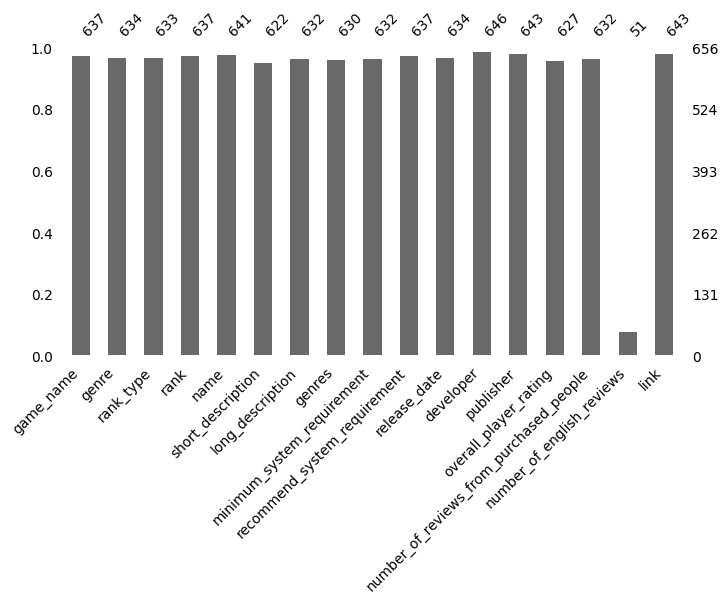

In [31]:
#!pip install missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemeniz lazım.
import missingno as msno

msno.bar(finaldf,
         figsize = (8, 4),
         fontsize = 10);

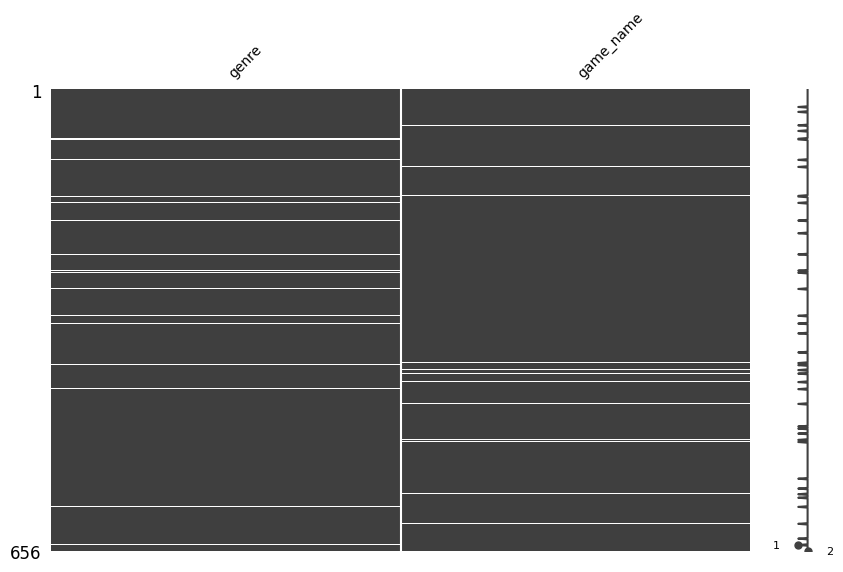

In [32]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
# siyah bölümler eksik olmayan, beyaz bölümler eksik olan kısımları gösteriyor.
# bir kolonda eksik olan veri diğerinde de hep eksik oluyorsa birbirleriyle bir ilişki olabilir.
msno.matrix(finaldf[['genre', 'game_name']],
            figsize = (10, 6),
            fontsize = 10);

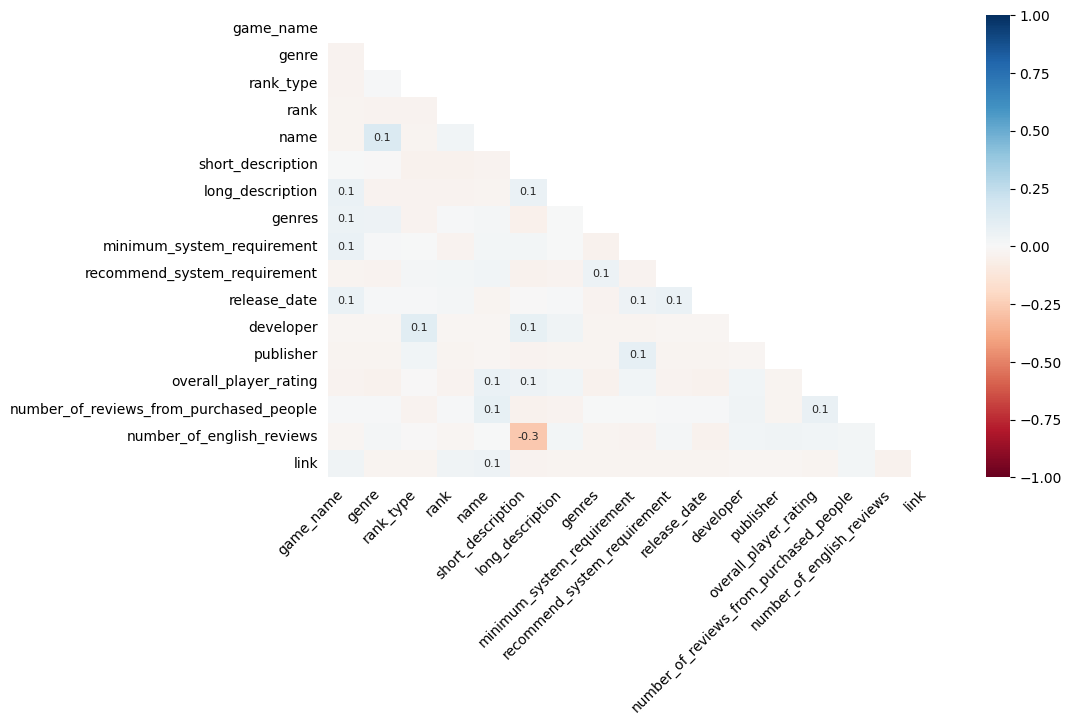

In [33]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(finaldf,
             figsize = (10, 6),
             fontsize = 10);

## 2.2 Yöntem 1: Eksik Verilerin Silinmesi
Veri setinde bulunan eksik verilere müdahale yöntemlerinden birisi, eksik verilerin silinmesidir. Uygulaması oldukça kolay bir yöntem olsa da eksik verileri silmeden önce dikkat edilmesi gereken önemli hususlar vardır.

Eksik bir verinin bulunduğu gözlemi silmeye karar verebilmek için, bu eksikliğin doğal olmayan bir şekilde ortaya çıktığından emin olmamız gerekir. Örneğin elimizdeki bir araç veri setinde elektrikli araçlar için motor hacmi kolonunda Na değer bulunması doğal bir eksikliğe işaret eder. Bu durumda silme işlemi yerine uygun bir şekilde doldurmak tercih edilebilir.

Eksik veriler veri setinde kayda değer bir yüzdeyi oluşturuyorsa, eksik verilerin silinmesi durumunda veri setindeki birçok gözlemi kaybedeceğimiz unutulmamalıdır. Bu durumda veri seti içerisinde bize bilgi sağlayabilecek birçok veriyi de kaybetmiş olacağız. Verinin olabildiğince fazla olması, hem analitik yöntemler hem de makine öğrenmesi yöntemleri için oldukça önemli olduğuna göre, veri setinden olabildiğince az kayıp verecek yöntemler denemeliyiz.

In [34]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı True olarak kullanılmalı veya atama yapılmalıdır.

dfClear = finaldf.dropna(inplace = False)[:5]
#dfClear.head()
dfClear.isna().sum()
#df = df.dropna()

game_name                                  0
genre                                      0
rank_type                                  0
rank                                       0
name                                       0
short_description                          0
long_description                           0
genres                                     0
minimum_system_requirement                 0
recommend_system_requirement               0
release_date                               0
developer                                  0
publisher                                  0
overall_player_rating                      0
number_of_reviews_from_purchased_people    0
number_of_english_reviews                  0
link                                       0
dtype: int64

In [35]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
finaldf.dropna(how = 'all')[:5]

,game_name,genre,rank_type,rank,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Counter-Strike 2,Action,Sales,1.0,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",NaN,['Valve'],['Valve'],Very Positive,"(8,313,603)",NaN,https://store.steampowered.com/app/730/Counter...
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2.0,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time",NaN,https://store.steampowered.com/app/2183900/War...
2,Cyberpunk 2077,Action,Sales,3.0,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)",NaN,https://store.steampowered.com/app/1091500/Cyb...
3,Black Myth: Wukong,Action,Sales,4.0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",NaN,['Requires a 64-bit processor and operating sy...,NaN,['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)",NaN,https://store.steampowered.com/app/2358720/Bla...
4,ELDEN RING,Action,Sales,5.0,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)",NaN,https://store.steampowered.com/app/1245620/ELD...


In [36]:
# Değişken bazında silmek için;
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı True olarak kullanılmalı veya atama yapılmalıdır.
finaldf.dropna(axis = 1)

""
0
1
2
3
4
...
651
652
653
654


## 2.3 Yöntem 2: Eksik Verilerin Doldurulması
Eksik verilerin doldurulması kararı, silinmesi işleminde olduğu gibi hassas ve bilinçli bir şekilde değerlendirilmesi gereken bir karardır. Zira doldurma işlemi veride gürültü (noise) oluşturabilir ve verinin istatistiksel olarak güvenilirliğini zedeleyebilir. Analitik durumlar içinse yanlış bilgi çıkarımlarına sebebiyet verebilir. Bu nedenle en sağlıklı doldurma kararının alındığı durumlarda dahi bu yanlılık durumu mutlaka göz önünde bulundurulmalıdır.

In [37]:
# Orjinal verileri kaybetmeyerek doldurma işlemlerini gerçekleştirmek için veri setimizin bir kopyasını alıyoruz.
df_fillna = finaldf.copy()

df_fillna.head(3)

,game_name,genre,rank_type,rank,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Counter-Strike 2,Action,Sales,1.0,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",NaN,['Valve'],['Valve'],Very Positive,"(8,313,603)",NaN,https://store.steampowered.com/app/730/Counter...
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2.0,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time",NaN,https://store.steampowered.com/app/2183900/War...
2,Cyberpunk 2077,Action,Sales,3.0,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)",NaN,https://store.steampowered.com/app/1091500/Cyb...


In [38]:
# eksik verileri tekrardan gözlemleyelim
df_fillna.isna().sum()

game_name                                   19
genre                                       22
rank_type                                   23
rank                                        19
name                                        15
short_description                           34
long_description                            24
genres                                      26
minimum_system_requirement                  24
recommend_system_requirement                19
release_date                                22
developer                                   10
publisher                                   13
overall_player_rating                       29
number_of_reviews_from_purchased_people     24
number_of_english_reviews                  605
link                                        13
dtype: int64

In [39]:
df_fillna.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,637.0,19.725275,11.455336,1.0,10.0,19.0,30.0,40.0
number_of_english_reviews,51.0,444.058824,337.264668,0.0,143.0,380.0,761.5,998.0


## 2.3.1 Sayısal Değişkenlerin Doldurulması

In [40]:
# Numerik bir değişkenin mean yani ortalama değeriyle doldurulması
# verilen uyarıda inplace true kullanmak yerine degisken atayarak kullanılmasını öneriyor
# zaten değişkenimizi ayarladığımız için sorun yok.
mean_numberOfEnglishReviews = df_fillna['number_of_english_reviews'].mean()

df_fillna['number_of_english_reviews'].fillna(value = mean_numberOfEnglishReviews, inplace = True)

df_fillna.isna().sum()


# Doldurma işleminin döngüyle yapılması
#to_be_filled = numerical_features[1:]

#for col in to_be_filled:
    #df_fillna[col].fillna(df[col].mean(), inplace = True)

/tmp/ipykernel_17/3297016074.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['number_of_english_reviews'].fillna(value = mean_numberOfEnglishReviews, inplace = True)


game_name                                  19
genre                                      22
rank_type                                  23
rank                                       19
name                                       15
short_description                          34
long_description                           24
genres                                     26
minimum_system_requirement                 24
recommend_system_requirement               19
release_date                               22
developer                                  10
publisher                                  13
overall_player_rating                      29
number_of_reviews_from_purchased_people    24
number_of_english_reviews                   0
link                                       13
dtype: int64

Doldurma işlemini mean yerine median değer ile de gerçekleştirebiliriz, ancak bunu kuyruklu (skewed) dağılımlarda yapmayı tercih ediyoruz.

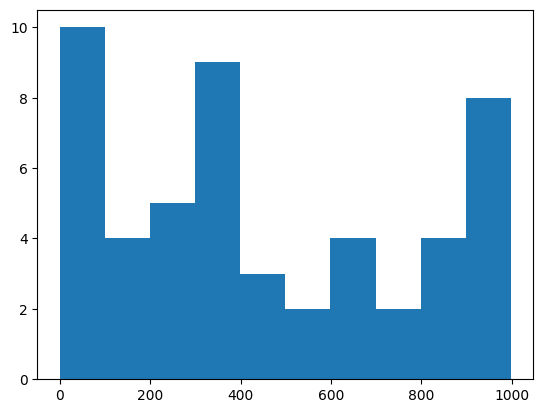

In [41]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(finaldf['number_of_english_reviews'])
plt.show()
# gördüğümüz üzere bizim datamız kuyruklu değil

In [42]:
df_fillna[["number_of_english_reviews"]][:20]

,number_of_english_reviews
0,444.058824
1,444.058824
2,444.058824
3,444.058824
4,444.058824
5,444.058824
6,444.058824
7,444.058824
8,444.058824
9,444.058824


## 2.3.2 Kategorik Değişkenlerin Doldurulması

In [43]:
# Kategorik bir değişkenin mode yani en cok tekrar eden değeriyle doldurulması
# benim senaryomda suan boyle bir doldurma yapmak istemedim

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu görelim.
""""df_fillna['work_setting'].isna().sum()

# work_setting değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['work_setting'].mode()

# work_setting değişkenini mode değeri ile dolduralım.
df_fillna['work_setting'] = df_fillna['work_setting'].fillna(value = work_setting_mode[0])

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()"""

'"df_fillna[\'work_setting\'].isna().sum()\n\n# work_setting değişkeninde en çok tekrar eden değeri(mode) alalım.\nwork_setting_mode = df_fillna[\'work_setting\'].mode()\n\n# work_setting değişkenini mode değeri ile dolduralım.\ndf_fillna[\'work_setting\'] = df_fillna[\'work_setting\'].fillna(value = work_setting_mode[0])\n\n# work_setting değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.\ndf_fillna.isna().sum()'

In [44]:
df_fillna[["publisher"]][:20] # cift [[]] kullanarak bir frame yapisinde bakiyoruz tek [] ise pandas series yapisidir.

,publisher
0,['Valve']
1,['Focus Entertainment']
2,['CD PROJEKT RED']
3,['Game Science']
4,"['FromSoftware, Inc.', 'Bandai Namco Entertain..."
5,"['KRAFTON, Inc.']"
6,['Electronic Arts']
7,['Valve']
8,['Source Technology']
9,"['SEGA', 'Feral Interactive']"


In [45]:
# Önceki değer ile doldurma işlemi
# Benim senaryomda suanlik ihtiyacim yok, fakat onceki ve sonraki deger ile doldurma işlemini
# Daha önce powerBI ile görselleştirmeler yaparken sıkça kullanmam gerekmişti, önemli bir yapı.
#df_fillna["publisher"].fillna(method = "bfill")
# Sonraki değer ile doldurma işlemi
#df_fillna["job_category"].fillna(method = "ffill")

## 2.3.3 Kategorik Kırılım İle Doldurma İşlemi

Burada basitçe mean ve median değerler ile doldurma işlemi yapmış olsak da, eksik veri durumunu bu kadar basit bir şekilde ele almak her zaman doğru olmayacaktır. Bu tarz basit doldurma işlemleri hızlı bir çözüm olarak ele alınmalıdır. Daha analitik bir yaklaşım için veri içerisinde benzetimler uygulayarak doldurma işlemlerini buna göre gerçekleştirebiliriz.

Örnek olarak eğitim projesinde elimizdeki salary kolonunu basitçe mean değer ile doldurmuştuk. Ancak biz biliyoruz ki elimizde job_title isimli bir kolon var ve bu kolonda farklı pozisyonlar yer almakta. Bu durumda örneğin Data Engineer pozisyonuna ait eksik bir maaş verisini, veri setimizdeki Data Engineer pozisyonlarına ait maaşların ortalama (veya median) değeriyle doldurmamız daha doğru bir yaklaşım olacaktır. Çünkü farklı pozisyonların farklı maaş ortalamaları olacağı için, eksik maaş verisini o kaydın ait olduğu grubun istatistiksel değerine göre doldurmak daha doğrudur.

In [46]:
# Örnek
#df_categorical_fillna = df.copy()

#df_categorical_fillna.isna().sum()
#df_categorical_fillna["salary"].fillna(value = df_categorical_fillna.groupby("job_title")["salary"].transform("mean"),
#                                       inplace = True)
# hem job title hem salary boş olursa referans alamayacagi icin o zaman ikisi de boş kalır.

In [47]:
# null olanlari gorebilmek icin bu sekilde filtreleyerek bakabiliriz.
# df_categorical_fillna[df_categorical_fillna['salary'].isnull()]

## 2.3.4 Makine Öğrenmesi ile Değer Atama Teknikleri

Makine öğrenmesi yöntemleri kullanarak da eksik verileri doldurmak mümkündür. Makine Öğrenmesi modelleri bu bootcamp çalışmamın konusu olmadığı için detaylı çalışma yapmayacağım.

Hangi yöntemler kullanılabilir?:

KNNImputer (K-Nearest Neighbor)
Random Forest Classifier
Google -> "How can I fill missing values by using Machine Learning techniques in Python?", "Python ile eksik verileri Makine Öğrenmesi teknikleri kullanarak nasıl doldurabilirim?"

# 3. Kategorik Değişken Analizi

## 3.1 Kategorik Değişken İşlemleri

In [48]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
# kategorik degisken tipi olarak illa object olmayabilir, farkli kategorik degisken tiplerim varsa onlari
# da almaliyiz.
finaldf_categorical = finaldf.select_dtypes(include = "object") 
finaldf_categorical.head(3)

,game_name,genre,rank_type,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,link
0,Counter-Strike 2,Action,Sales,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",NaN,['Valve'],['Valve'],Very Positive,"(8,313,603)",https://store.steampowered.com/app/730/Counter...
1,"Warhammer 40,000: Space Marine 2",Action,Sales,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time",https://store.steampowered.com/app/2183900/War...
2,Cyberpunk 2077,Action,Sales,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)",https://store.steampowered.com/app/1091500/Cyb...


In [49]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
finaldf_categorical["publisher"].unique()

array(["['Valve']", "['Focus Entertainment']", "['CD PROJEKT RED']",
       "['Game Science']",
       "['FromSoftware, Inc.', 'Bandai Namco Entertainment']",
       "['KRAFTON, Inc.']", "['Electronic Arts']",
       "['Source Technology']", "['SEGA', 'Feral Interactive']",
       "['Starry Studio']", "['NetEase Games Global']",
       "['Digital Extremes']", "['Xbox Game Studios']",
       "['Rockstar Games']", "['Ubisoft']",
       "['Activision', 'Aspyr (Mac)']", "['SEGA']",
       "['Behaviour Interactive Inc.']", "['Activision']", "['NEXON']",
       "['CAPCOM Co., Ltd.']", "['Mirage Creative Lab']",
       "['Facepunch Studios']", "['Nolla Games']",
       "['Blizzard Entertainment, Inc.']", "['Square Enix']",
       "['Bungie']", "['Wallpaper Engine Team']",
       "['Bethesda Softworks']", "['Pearl Abyss']",
       "['Gearbox Publishing']", "['Re-Logic']", "['Endnight Games Ltd']",
       "['Innersloth']",
       "['Activision (Excluding Japan and Asia)', 'FromSoftware, Inc. (J

In [50]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in finaldf_categorical.columns:
    print(f'There are {finaldf_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 285 unique values in "game_name" categorical feature.

There are 6 unique values in "genre" categorical feature.

There are 3 unique values in "rank_type" categorical feature.

There are 281 unique values in "name" categorical feature.

There are 275 unique values in "short_description" categorical feature.

There are 286 unique values in "long_description" categorical feature.

There are 282 unique values in "genres" categorical feature.

There are 273 unique values in "minimum_system_requirement" categorical feature.

There are 261 unique values in "recommend_system_requirement" categorical feature.

There are 269 unique values in "release_date" categorical feature.

There are 215 unique values in "developer" categorical feature.

There are 172 unique values in "publisher" categorical feature.

There are 10 unique values in "overall_player_rating" categorical feature.

There are 281 unique values in "number_of_reviews_from_purchased_people" categorical feature.

There are 2

In [51]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
# Bu işlem, önceki PowerBI tecrübelerimde oldukça sık kullandığım işlemlerden biriydi.
for col in finaldf_categorical.columns:
    print(f'{finaldf_categorical[col].value_counts()}\n', 5*"*********")

game_name
Black Myth: Wukong                       9
Dota 2                                   9
The Witcher 3: Wild Hunt                 8
Once Human                               8
Persona 3 Reload                         7
                                        ..
Totally Accurate Battle Simulator        1
Kerbal Space Program                     1
Arma 3                                   1
Oxygen Not Included                      1
Grand Mountain Adventure: Wonderlands    1
Name: count, Length: 285, dtype: int64
 *********************************************
genre
Simulation         114
Strategy           114
Sports & Racing    111
Action             107
Role-Playing        99
Adventure           89
Name: count, dtype: int64
 *********************************************
rank_type
Revenue    228
Sales      204
Review     201
Name: count, dtype: int64
 *********************************************
name
Black Myth: Wukong                       9
Dota 2                                

In [52]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
comp_categories = finaldf["overall_player_rating"].unique().tolist()[::-1]
comp_categories
# Sırayı düzeltmem gerekiyor
# İstenen sıralama
desired_order = [
    'Overwhelmingly Positive',
    'Very Positive',
    'Positive',
    'Mostly Positive',
    'Mixed',
    'Mostly Negative',
    'Very Negative',
    '6 user reviews',
    '7 user reviews',
    '4 user reviews',
    np.nan  # Eğer NaN değerler varsa
]

# comp_categories listesini referans listeye göre sıralama
comp_categories_sorted = sorted(comp_categories, key=lambda x: desired_order.index(x) if x in desired_order else len(desired_order))
comp_categories_sorted


['Overwhelmingly Positive',
 'Very Positive',
 'Positive',
 'Mostly Positive',
 'Mixed',
 'Mostly Negative',
 'Very Negative',
 '6 user reviews',
 '7 user reviews',
 '4 user reviews',
 nan]

In [53]:
# overall_player_rating sütununda null değerleri kontrol edin
print(f"Null değer sayısı: {finaldf['overall_player_rating'].isnull().sum()}")

# Null değer içeren satırları kaldırıyorum çünkü veri analizimi çok yanıltabilir
finaldfClear = finaldf.dropna(subset=["overall_player_rating"]).copy()


# Kontrol
print(f"Kalan satır sayısı: {len(finaldfClear)}")
print(f"Null değer sayısı: {finaldfClear['overall_player_rating'].isnull().sum()}")
# artik elimde finaldfClear olarak overall_player_ratingi null olmayan datasetim mevcut
# todo : silme işlemi yapmadan önce yüzde kaç null içeriyior bakabiliriz ama her halükarda silmeliyim

Null değer sayısı: 29
Kalan satır sayısı: 627
Null değer sayısı: 0


In [54]:
import re

# 1. overall_player_rating sütununu dönüştürerek yeni bir sütun ekle

rating_mapping = {
    'Overwhelmingly Positive' : 9,
    'Very Positive' : 8,
    'Positive' : 7,
    'Mostly Positive' : 6,
    'Mixed' : 5,
    'Mostly Negative' : 4,
    'Very Negative' : 3,
    '6 user reviews' : 2,
    '7 user reviews' : 1,
    '4 user reviews' : 0,
}
# Yeni bir sütun ekliyoruz
finaldfClear["overall_player_rating_number"] = finaldfClear["overall_player_rating"].map(rating_mapping)
#finaldfClear artık overall ratingde null değerler yok ve mapping ile sayısal değer verdim


In [55]:
# Ordinal değişken nasıl oluşturulur?
# Şimdilik null degerler oldugu icin bunu yapamiyorum, projede null degerleri doldurduktan sonra kullanacagim
#from pandas.api.types import CategoricalDtype

#finaldf["overall_player_rating"] = finaldf["overall_player_rating"].astype(CategoricalDtype(categories = comp_categories, ordered = True))
#finaldf["overall_player_rating"].head()

## 3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri

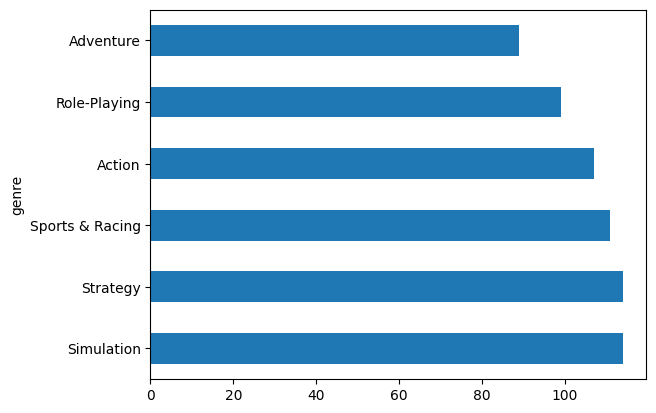

In [56]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
finaldf['genre'].value_counts().plot.barh();

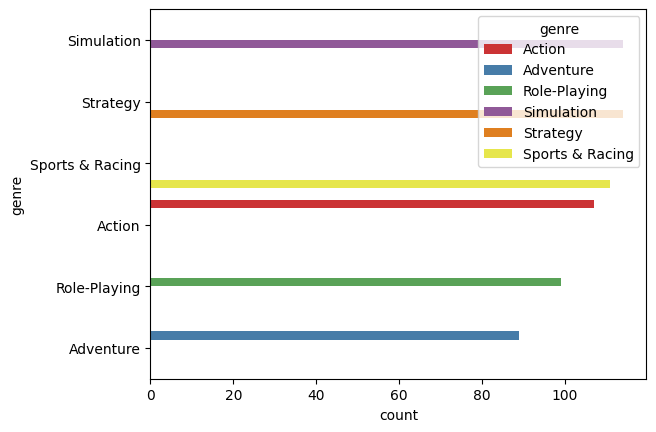

In [57]:
sns.countplot(data = finaldf,
              y = "genre",
              hue = "genre",
              order = finaldf["genre"].value_counts().index,
              palette = "Set1");

In [58]:
"""""sns.catplot(data = finaldfClear,
            x = "genre",
            y = "rank");"""

'""sns.catplot(data = finaldfClear,\n            x = "genre",\n            y = "rank");'

In [59]:
print(finaldfClear.columns)



Index(['game_name', 'genre', 'rank_type', 'rank', 'name', 'short_description',
       'long_description', 'genres', 'minimum_system_requirement',
       'recommend_system_requirement', 'release_date', 'developer',
       'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews',
       'link', 'overall_player_rating_number'],
      dtype='object')


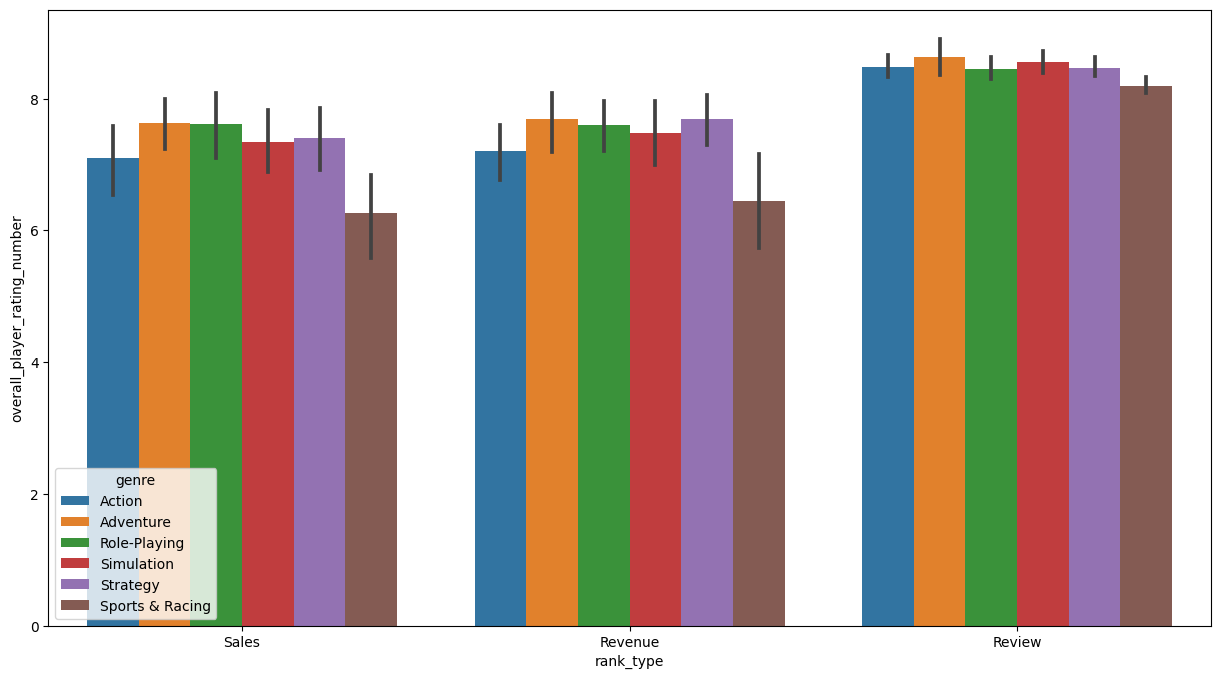

In [60]:
plt.figure(figsize = (15, 8))
sns.barplot(data = finaldfClear,
            x = "rank_type",
            y = "overall_player_rating_number",
            hue = "genre");
# bu sefer genre kırılımında bakıyoruz. TODO: bu çıkarımların markdown olarak açıklamalarını eklemek

## 3.3 Kategorik Gruplama (groupby) İşlemleri

In [61]:
df_genreRate = finaldfClear.groupby(by = "genre")["overall_player_rating_number"].mean().to_frame().reset_index().sort_values(by = "overall_player_rating_number", ascending = False)

df_genreRate

,genre,overall_player_rating_number
2,Role-Playing,7.946809
5,Strategy,7.891892
3,Simulation,7.825688
1,Adventure,7.821429
0,Action,7.607843
4,Sports & Racing,7.028571


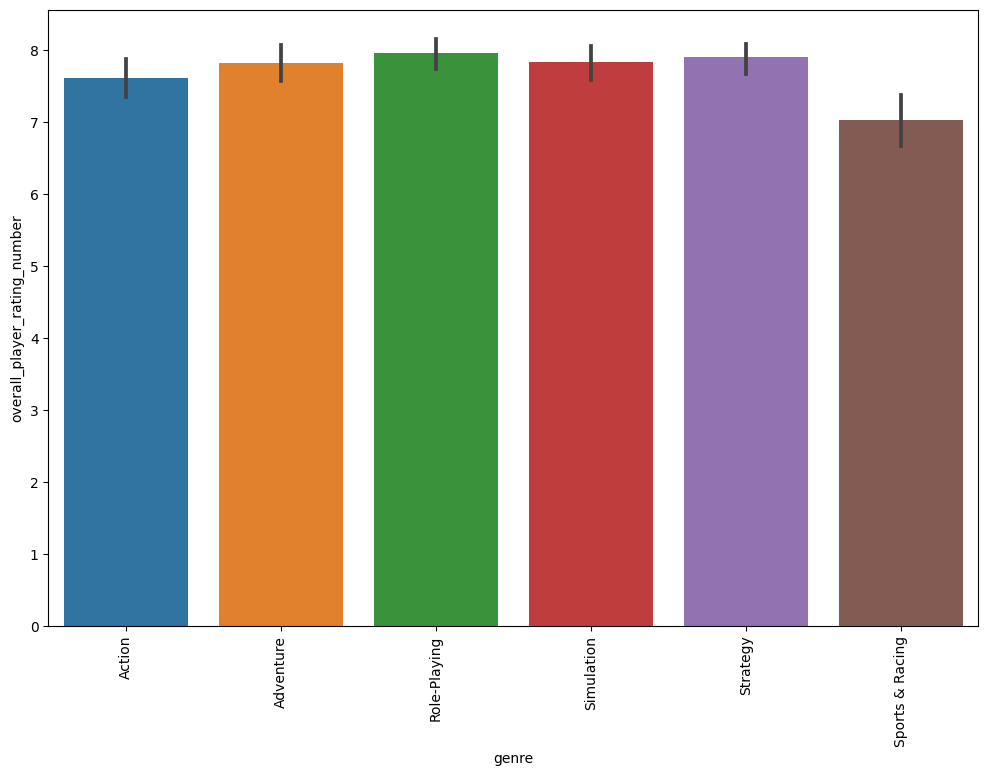

In [62]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = finaldfClear, x = "genre", y = "overall_player_rating_number");

In [63]:
finaldfClear_publisher = finaldfClear.groupby(by = "publisher")["name"].value_counts().to_frame().reset_index().sort_values(by = "count", ascending = False)
df_location_valve = finaldfClear_publisher[finaldfClear_publisher['publisher'] == "['Valve']"]
df_location_valve

,publisher,name,count
247,['Valve'],Dota 2,9
248,['Valve'],Counter-Strike 2,3
249,['Valve'],Team Fortress 2,2
252,['Valve'],Portal 2,1
251,['Valve'],Left 4 Dead 2,1
250,['Valve'],Garry's Mod,1


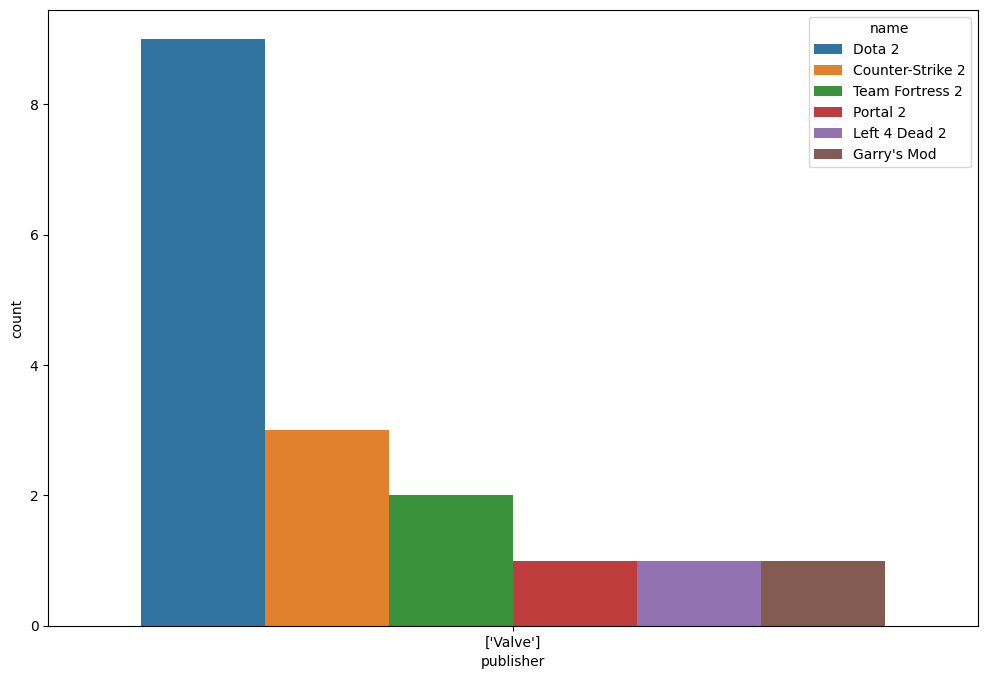

In [64]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df_location_valve, x = "publisher", y = 'count', hue = "name");

# ALIŞTIRMA: Bu yaptığımız işlemi bir fonksiyon haline getirin, bu fonksiyon kendi içinde yukarıdaki gruplama işlemini yaparak argüman olarak verilen ülke
#            ismine göre aşağıdaki grafiği oluşturmalıdır.

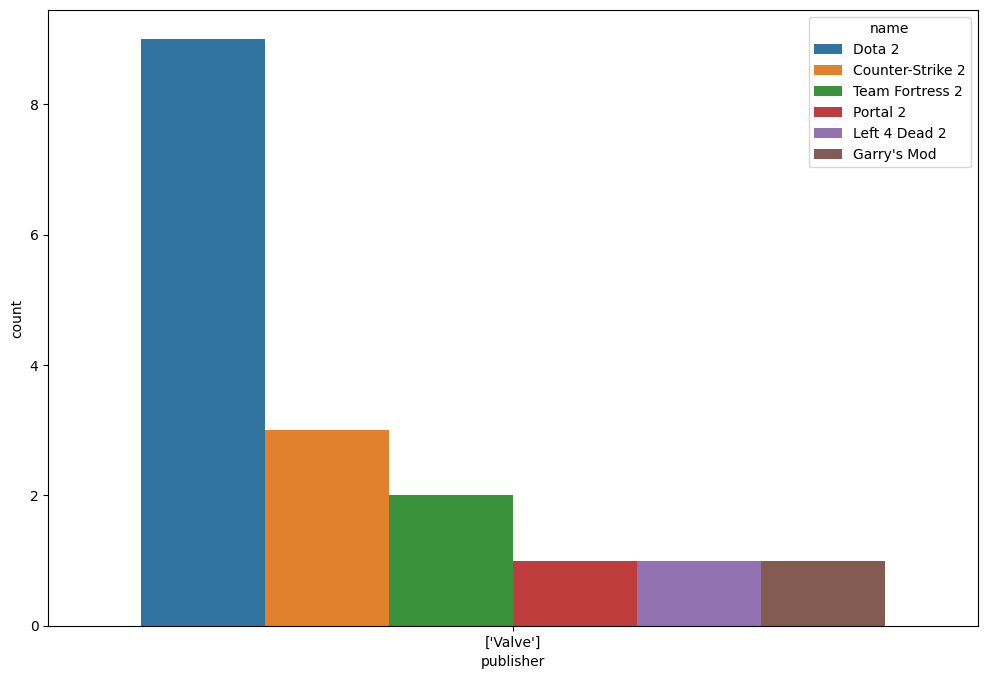

In [65]:
# olusturdugum bu fonk sayesinde rahatlikla gorsellestirme yapabiliyoruz
def byCompany(publisherName):
    compString = f"['{publisherName}']"  # f-string ile string oluşturma
    finaldfClear_publisher = finaldfClear.groupby(by="publisher")["name"].value_counts().to_frame().reset_index().sort_values(by="count", ascending=False)
    df_location_comp = finaldfClear_publisher[finaldfClear_publisher['publisher'] == compString]
    #df_location_comp
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_location_comp, x="publisher", y="count", hue="name")
    
byCompany("Valve")

In [66]:
filtered_data = finaldf[finaldf['name'] == "Dota 2"]
filtered_data.head(9)

,game_name,genre,rank_type,rank,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
7,Dota 2,Action,NaN,9.0,Dota 2,"Every day, millions of players worldwide enter...",About This Game\nThe most-played game on Steam...,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['OS *: Windows 7 or newer', 'Processor: Dual ...","['OS *: Windows 7 or newer', 'Processor: Dual ...","9 Jul, 2013",['Valve'],['Valve'],Very Positive,"(2,322,723)",NaN,https://store.steampowered.com/app/570/Dota_2?...
42,Dota 2,Action,Revenue,8.0,Dota 2,"Every day, millions of players worldwide enter...",About This Game\nThe most-played game on Steam...,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['OS *: Windows 7 or newer', 'Processor: Dual ...",NaN,"9 Jul, 2013",['Valve'],['Valve'],Very Positive,"(2,322,723)",NaN,https://store.steampowered.com/app/570/Dota_2?...
76,Dota 2,Action,Review,3.0,Dota 2,"Every day, millions of players worldwide enter...",About This Game\nThe most-played game on Steam...,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['OS *: Windows 7 or newer', 'Processor: Dual ...","['OS *: Windows 7 or newer', 'Processor: Dual ...","9 Jul, 2013",['Valve'],['Valve'],Very Positive,"(2,322,723)",NaN,https://store.steampowered.com/app/570/Dota_2?...
207,Dota 2,Role-Playing,Sales,4.0,Dota 2,"Every day, millions of players worldwide enter...",About This Game\nThe most-played game on Steam...,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['OS *: Windows 7 or newer', 'Processor: Dual ...","['OS *: Windows 7 or newer', 'Processor: Dual ...","9 Jul, 2013",['Valve'],['Valve'],Very Positive,"(2,322,723)",NaN,https://store.steampowered.com/app/570/Dota_2?...
235,Dota 2,Role-Playing,Revenue,9.0,Dota 2,"Every day, millions of players worldwide enter...",About This Game\nThe most-played game on Steam...,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['OS *: Windows 7 or newer', 'Processor: Dual ...","['OS *: Windows 7 or newer', 'Processor: Dual ...","9 Jul, 2013",['Valve'],['Valve'],Very Positive,"(2,322,723)",NaN,https://store.steampowered.com/app/570/Dota_2?...
267,Dota 2,Role-Playing,Review,1.0,Dota 2,NaN,About This Game\nThe most-played game on Steam...,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['OS *: Windows 7 or newer', 'Processor: Dual ...","['OS *: Windows 7 or newer', 'Processor: Dual ...","9 Jul, 2013",['Valve'],['Valve'],Very Positive,"(2,322,723)",NaN,https://store.steampowered.com/app/570/Dota_2?...
428,Dota 2,Strategy,Sales,3.0,Dota 2,"Every day, millions of players worldwide enter...",About This Game\nThe most-played game on Steam...,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['OS *: Windows 7 or newer', 'Processor: Dual ...","['OS *: Windows 7 or newer', 'Processor: Dual ...","9 Jul, 2013",['Valve'],['Valve'],Very Positive,"(2,322,723)",NaN,https://store.steampowered.com/app/570/Dota_2?...
464,Dota 2,Strategy,Revenue,3.0,Dota 2,"Every day, millions of players worldwide enter...",About This Game\nThe most-played game on Steam...,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['OS *: Windows 7 or newer', 'Processor: Dual ...","['OS *: Windows 7 or newer', 'Processor: Dual ...","9 Jul, 2013",['Valve'],['Valve'],Very Positive,"(2,322,723)",NaN,https://store.steampowered.com/app/570/Dota_2?...
501,Dota 2,Strategy,Review,NaN,Dota 2,"Every day, millions of players worldwide enter...",About This Game\nThe most-played game on Steam...,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...","['OS *: Windows 7 or newer', 'Processor: Dual ...","['OS *: Windows 7 or newer', 'Processor: Dual ...","9 Jul, 2013",['Valve'],['Valve'],Very Positive,"(2,322,723)",NaN,https://store.steampowered.com/app/570/Dota_2?...


# 4. Sürekli Değişken Analizi

## 4.1 Sürekli Değişkenlerin İncelenmesi

In [67]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = finaldfClear.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,rank,number_of_english_reviews,overall_player_rating_number
0,1.0,NaN,8
1,2.0,NaN,8
2,3.0,NaN,8
3,4.0,NaN,9
4,5.0,NaN,8


In [68]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,608.0,19.754934,11.516658,1.0,10.00,19.5,30.00,40.0
number_of_english_reviews,50.0,452.940000,334.610368,2.0,175.75,380.0,768.75,998.0
overall_player_rating_number,627.0,7.673046,1.383364,0.0,8.00,8.0,9.00,9.0


In [69]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
#sns.histplot(data = finaldfClear, x = "overall_player_rating_number", kde = True, hue = "genre");

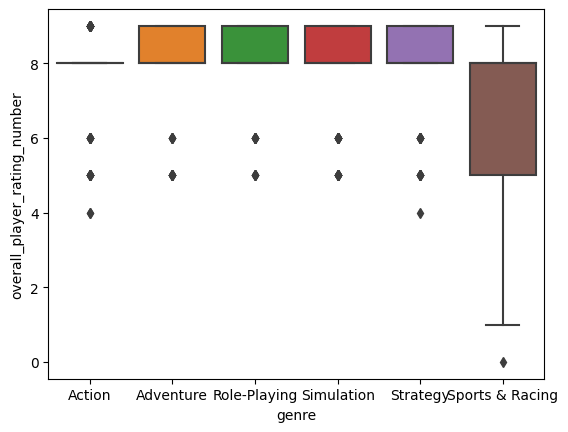

In [70]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
sns.boxplot(data = finaldfClear,
            x = "genre",
            y = "overall_player_rating_number");

# 5. Aykırı Değer Analizi (Outliers)
Aykırı değerlerin analizi de tıpkı eksik verilerde olduğu gibi hassasiyetle değerlendirilmelidir. Aykırı değerlerin varlığı veri setindeki dağılımları etkileyeceği için, aykırı değere sahip bir veri setiyle tahmin modeli oluşturduğumuzda modelimizin genellenebilirliğinin düşmesine sebep olacaktır.

Aykırı değerlerin değerlendirilmesi için sektörel bilgi, standart sapma yaklaşımı, Z-skoru, IQR yöntemi gibi yöntemler kullanılabilir. Biz burada IQR yöntemi ile basitçe bir düzeltme işlemi uygulayacağız.

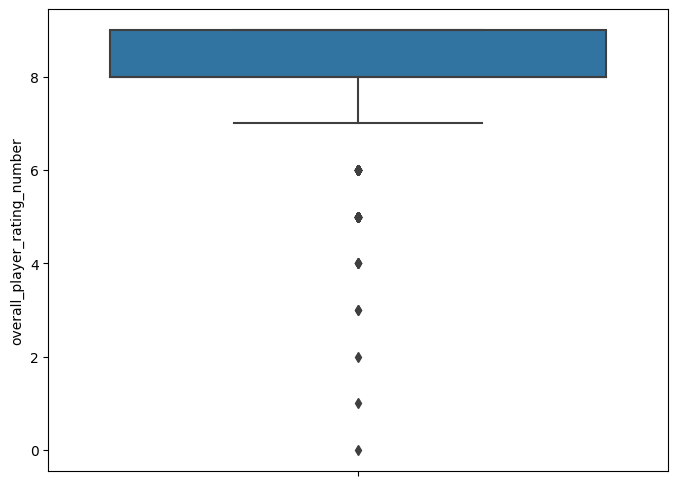

In [71]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = finaldfClear,
            y = finaldfClear["overall_player_rating_number"],
            orient = "v");

In [72]:
""""# Quantile değerlerin belirlenmesi hakkinda ornek ancak benim senaryoma cok uymuyor
df_rating = finaldfClear['overall_player_rating_number']
Q1 = df_rating(0.25)
Q3 = df_rating(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = df_rating[df_rating > upper_fence].index

outlier_idx

df_rating[df_rating > upper_fence]"""

'"# Quantile değerlerin belirlenmesi hakkinda ornek ancak benim senaryoma cok uymuyor\ndf_rating = finaldfClear[\'overall_player_rating_number\']\nQ1 = df_rating(0.25)\nQ3 = df_rating(0.75)\n\nprint(Q1)\nprint(Q3)\n\n# IQR değerin belirlenmesi.\nIQR = Q3-Q1\nprint(IQR)\n\n# Alt ve üst sınırların belirlenmesi.\nlower_fence = Q1 - 1.5*IQR\nupper_fence = Q3 + 1.5*IQR\n\n# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.\noutlier_idx = df_rating[df_rating > upper_fence].index\n\noutlier_idx\n\ndf_rating[df_rating > upper_fence]'

## 5.1 Aykırı Gözlemlerin Silinmesi

In [73]:
""""# Aykırı gözlemlerin silinme örneği
df_del = df[~(df_rating > upper_fence)]

df_del"""

'"# Aykırı gözlemlerin silinme örneği\ndf_del = df[~(df_rating > upper_fence)]\n\ndf_del'

## 5.2 Aykırı Gözlemlerin Doldurulması

## 5.2.1 Ortalama Değer İle Doldurma

In [74]:
## Yine benim senaryom icin uygun olmayan bir ortalama deger ile doldurma ornegi
""""finaldfClear.loc[df_rating > upper_fence, "overall_player_rating_number"] = df_rating.mean()
finaldfClear.loc[df_rating > upper_fence, "overall_player_rating_number"]
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = finaldfClear["overall_player_rating_number"],
            orient = "v");"""

'"finaldfClear.loc[df_rating > upper_fence, "overall_player_rating_number"] = df_rating.mean()\nfinaldfClear.loc[df_rating > upper_fence, "overall_player_rating_number"]\nplt.figure(figsize = (8, 6))\nsns.boxplot(data = df_del,\n            y = finaldfClear["overall_player_rating_number"],\n            orient = "v");'

## 5.2.2 Baskılama 
Bu yöntemde verimizi outliers sınırlarımızın icerisine baskılıyoruz

In [75]:
# Baskılama örnegi
""""finaldfClear.loc[df_rating > upper_fence, "overall_player_rating_number"] = upper_fence
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["overall_player_rating_number"],
            orient = "v");"""
# TODO : Local Outlier Factor yöntemini araştır

'"finaldfClear.loc[df_rating > upper_fence, "overall_player_rating_number"] = upper_fence\nplt.figure(figsize = (8, 6))\nsns.boxplot(data = df_del,\n            y = df["overall_player_rating_number"],\n            orient = "v");'

# 6. Feature Engineering
Bu bölümde veri setindeki özellikleri kullanarak ne tür özellikler türetebileceğimize bakarız. Aslında benim yukarıda 55. satırda yaptığım overall ratingler için sayı belirleyerek yeni bir sütun oluşturma işlemi bu bölüme dahil oluyor, işimize yarayacak yeni sütunlar türetiyoruz. Bu da powerBI ile çalıştığım dönemde yine sıklıkla kullandığım bir yöntemdi.

In [76]:
import re

# 1. overall_player_rating sütununu dönüştürerek yeni bir sütun ekle

rating_mapping = {
    'Overwhelmingly Positive' : 9,
    'Very Positive' : 8,
    'Positive' : 7,
    'Mostly Positive' : 6,
    'Mixed' : 5,
    'Mostly Negative' : 4,
    'Very Negative' : 3,
    '6 user reviews' : 2,
    '7 user reviews' : 1,
    '4 user reviews' : 0,
}
# Yeni bir sütun ekliyoruz
finaldfClear["overall_player_rating_number"] = finaldfClear["overall_player_rating"].map(rating_mapping)
#finaldfClear artık overall ratingde null değerler yok ve mapping ile sayısal değer verdim


In [77]:
finaldfClear.head()

,game_name,genre,rank_type,rank,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link,overall_player_rating_number
0,Counter-Strike 2,Action,Sales,1.0,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",NaN,['Valve'],['Valve'],Very Positive,"(8,313,603)",NaN,https://store.steampowered.com/app/730/Counter...,8
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2.0,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time",NaN,https://store.steampowered.com/app/2183900/War...,8
2,Cyberpunk 2077,Action,Sales,3.0,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)",NaN,https://store.steampowered.com/app/1091500/Cyb...,8
3,Black Myth: Wukong,Action,Sales,4.0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",NaN,['Requires a 64-bit processor and operating sy...,NaN,['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)",NaN,https://store.steampowered.com/app/2358720/Bla...,9
4,ELDEN RING,Action,Sales,5.0,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)",NaN,https://store.steampowered.com/app/1245620/ELD...,8


In [78]:
# Konu ile ilgili egitimde kullanılan veri seti icin guzel bir ornek
# USD bazında maaş tutarlarına göre maaş segmentasyonu oluşturabiliriz.

""""def salary_range(salary):
    if salary < 80000:
        return 'Low'
    elif 80000 <= salary <= 150000:
        return 'Medium'
    else:
        return 'High'

df['salary_range'] = df['salary_in_usd'].apply(salary_range)

df.head(3)"""

'"def salary_range(salary):\n    if salary < 80000:\n        return \'Low\'\n    elif 80000 <= salary <= 150000:\n        return \'Medium\'\n    else:\n        return \'High\'\n\ndf[\'salary_range\'] = df[\'salary_in_usd\'].apply(salary_range)\n\ndf.head(3)'

# Görselleştirme Çalışmaları

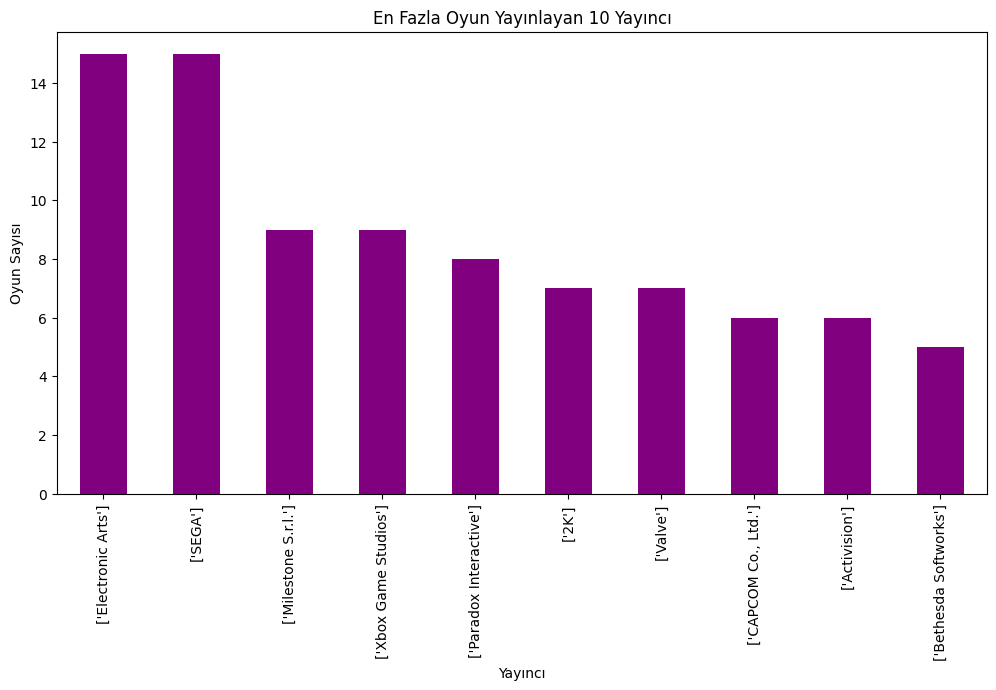

In [79]:
# En Fazla Oyun Yayınlayan 10 Yayıncı
top_publishers = df3['publisher'].value_counts().head(10)
top_publishers.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title("En Fazla Oyun Yayınlayan 10 Yayıncı")
plt.xlabel("Yayıncı")
plt.ylabel("Oyun Sayısı")
plt.show()


                                              name  \
77                                        Terraria   
96                                   Hollow Knight   
104                              Vampire Survivors   
102                                   Titanfall® 2   
101                                  Borderlands 2   
273  Divinity: Original Sin 2 - Definitive Edition   
99                              Deep Rock Galactic   
282                             Fallout: New Vegas   
285                               Persona 4 Golden   
95                                           Hades   

     overall_player_rating_number  
77                              9  
96                              9  
104                             9  
102                             9  
101                             9  
273                             9  
99                              9  
282                             9  
285                             9  
95                              9  


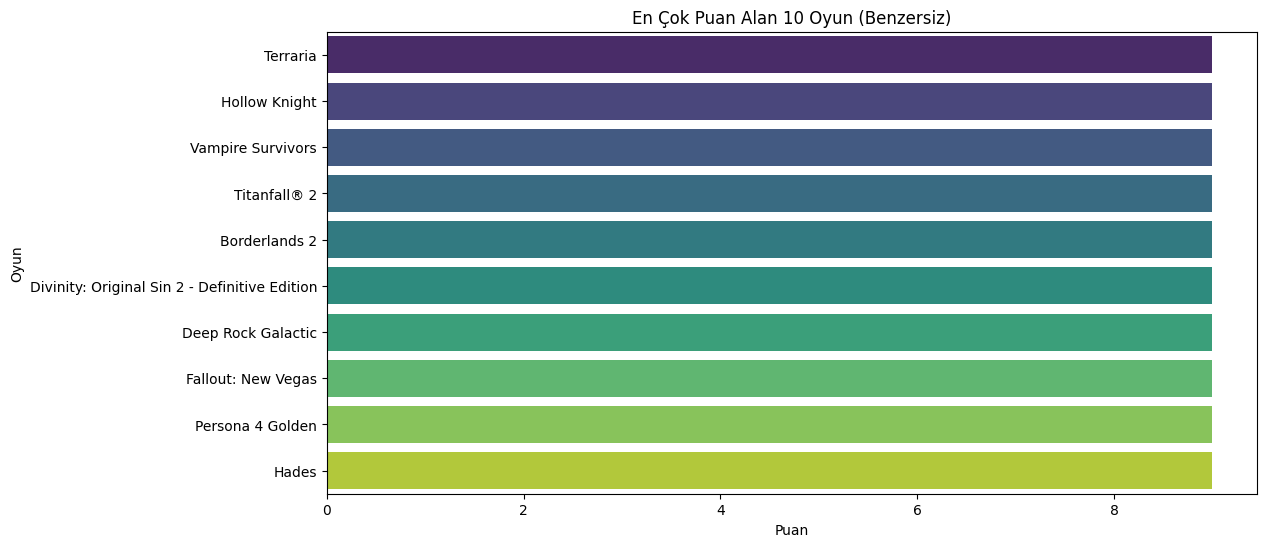

In [80]:
# İsme göre benzersiz oyunları seçiyoruz
unique_games = finaldfClear.drop_duplicates(subset="name")

# İlk 10 popüler oyun
top_games = unique_games.sort_values(by="overall_player_rating_number", ascending=False).head(10)
print(top_games[["name", "overall_player_rating_number"]])

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_games, x="overall_player_rating_number", y="name", palette="viridis")
plt.title("En Çok Puan Alan 10 Oyun (Benzersiz)")
plt.xlabel("Puan")
plt.ylabel("Oyun")
plt.show()


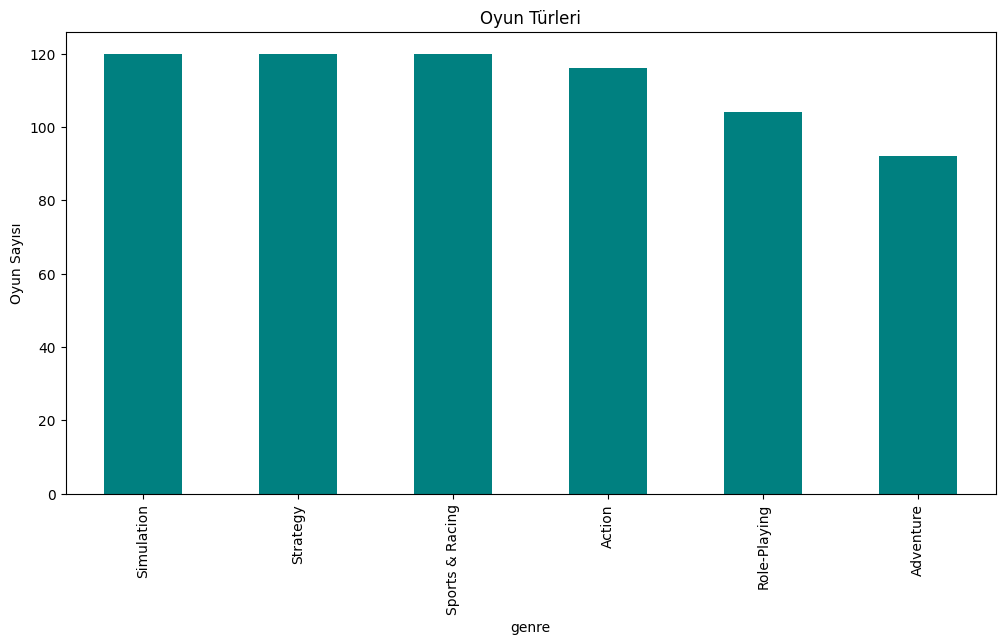

In [81]:
popular_genres = df2["genre"].value_counts().head(10)
popular_genres.plot(kind="bar", figsize=(12, 6), color="teal")
plt.title("Oyun Türleri")
plt.ylabel("Oyun Sayısı")
plt.show()


In [82]:
# release_date sütununu datetime tipine dönüştürme
finaldfClear["release_date"] = pd.to_datetime(finaldfClear["release_date"], errors="coerce")

# Geçerli bir tarihe sahip olmayanları kaldırma
finaldfClear = finaldfClear.dropna(subset=["release_date"])


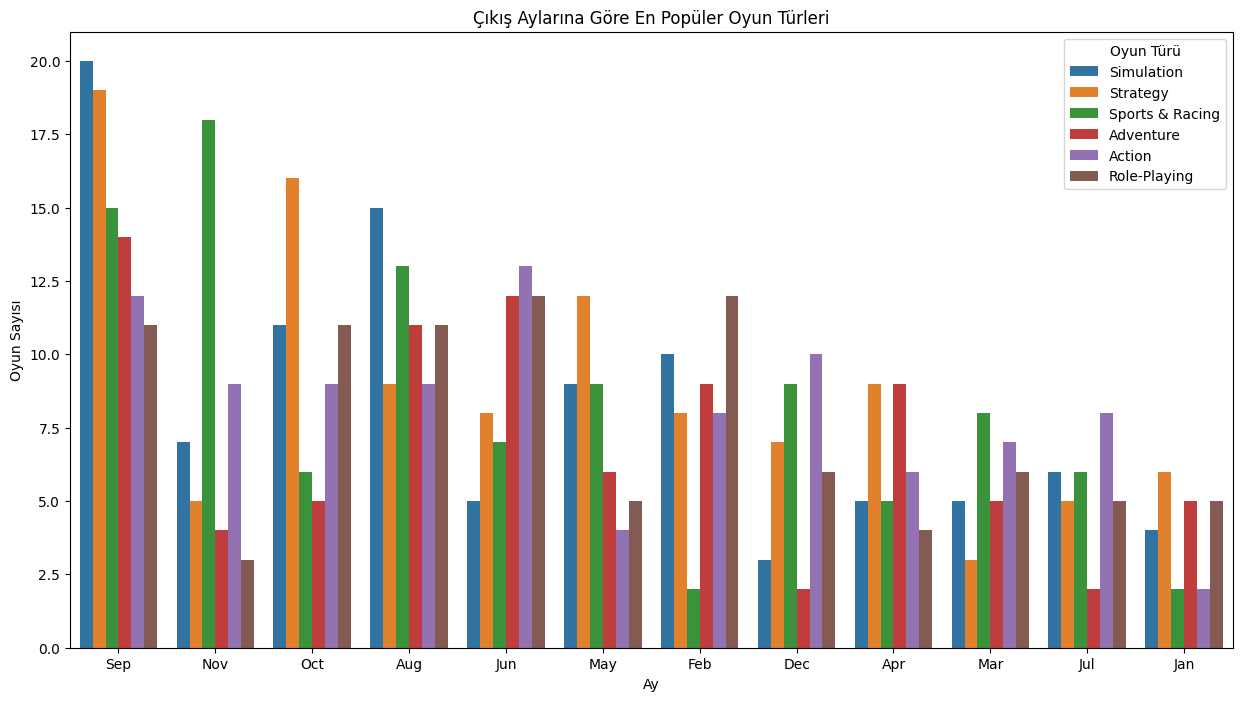

In [83]:
# Ay bilgisi ekleme
finaldfClear["release_month"] = finaldfClear["release_date"].dt.month

# Ay isimlerini ekleme
import calendar
finaldfClear["release_month_name"] = finaldfClear["release_month"].apply(lambda x: calendar.month_abbr[x] if x > 0 else None)

# Çıkış ayına göre oyun janraları gruplama
top_genres_by_month = (
    finaldfClear.groupby(["release_month_name", "genre"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

# Çıkış aylarına göre en popüler janralar (Barplot)
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top_genres_by_month,
    x="release_month_name",
    y="count",
    hue="genre",
    dodge=True,
    palette="tab10"
)
plt.title("Çıkış Aylarına Göre En Popüler Oyun Türleri")
plt.xlabel("Ay")
plt.ylabel("Oyun Sayısı")
plt.legend(title="Oyun Türü")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


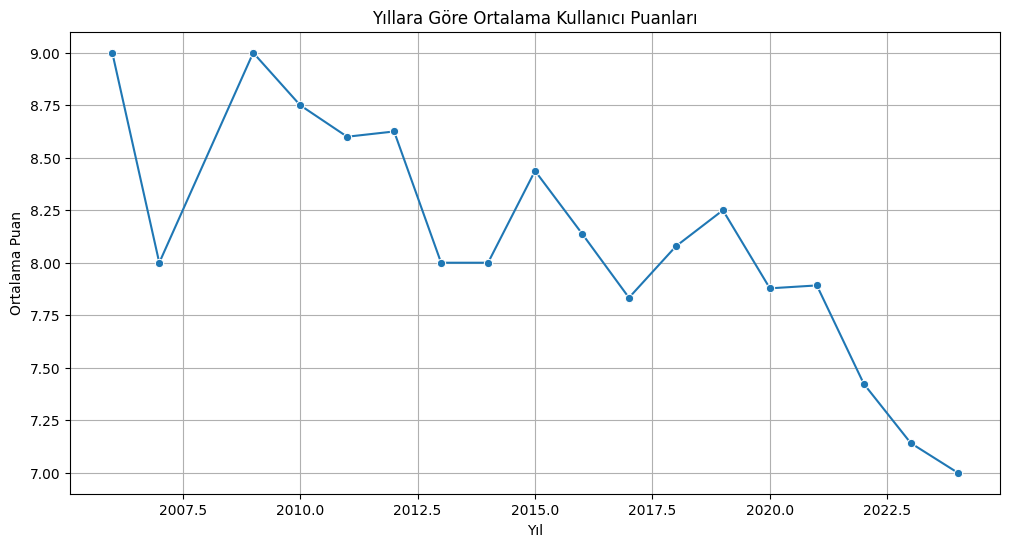

In [84]:
# Yıl bilgisi ekleme
finaldfClear["release_year"] = finaldfClear["release_date"].dt.year

# Yıllara göre ortalama kullanıcı puanı
avg_ratings_by_year = (
    finaldfClear.groupby("release_year")["overall_player_rating_number"]
    .mean()
    .reset_index()
    .sort_values(by="release_year")
)

# Çizgi grafiği
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_ratings_by_year, x="release_year", y="overall_player_rating_number", marker="o")
plt.title("Yıllara Göre Ortalama Kullanıcı Puanları")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Puan")
plt.grid(True)
plt.show()


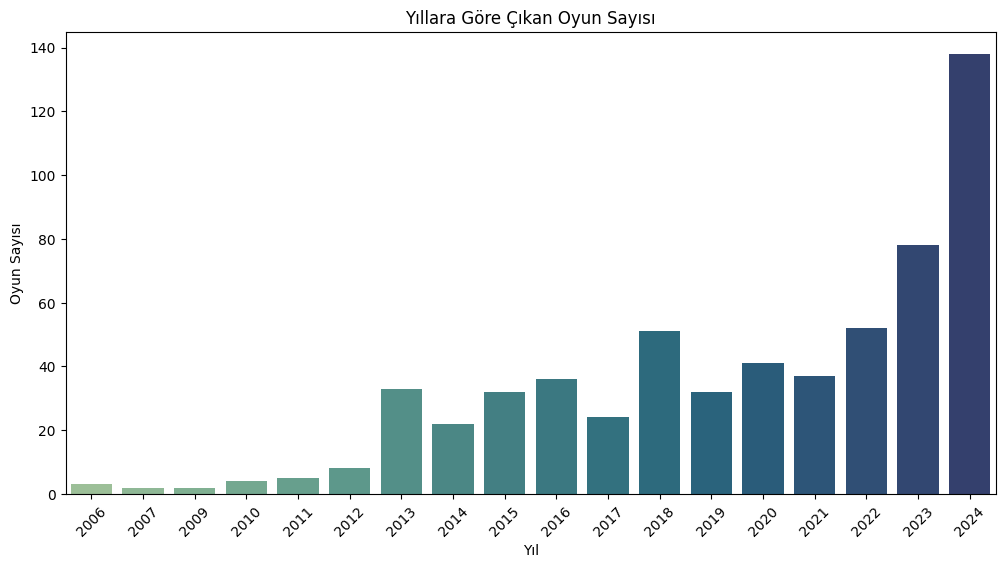

In [85]:
# Yıllara göre çıkan oyun sayısı
games_per_year = (
    finaldfClear.groupby("release_year").size()
    .reset_index(name="game_count")
    .sort_values(by="release_year")
)

# Çubuk grafik
plt.figure(figsize=(12, 6))
sns.barplot(data=games_per_year, x="release_year", y="game_count", palette="crest")
plt.title("Yıllara Göre Çıkan Oyun Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Oyun Sayısı")
plt.xticks(rotation=45)
plt.show()


In [86]:
print(finaldfClear.columns)


Index(['game_name', 'genre', 'rank_type', 'rank', 'name', 'short_description',
       'long_description', 'genres', 'minimum_system_requirement',
       'recommend_system_requirement', 'release_date', 'developer',
       'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews',
       'link', 'overall_player_rating_number', 'release_month',
       'release_month_name', 'release_year'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


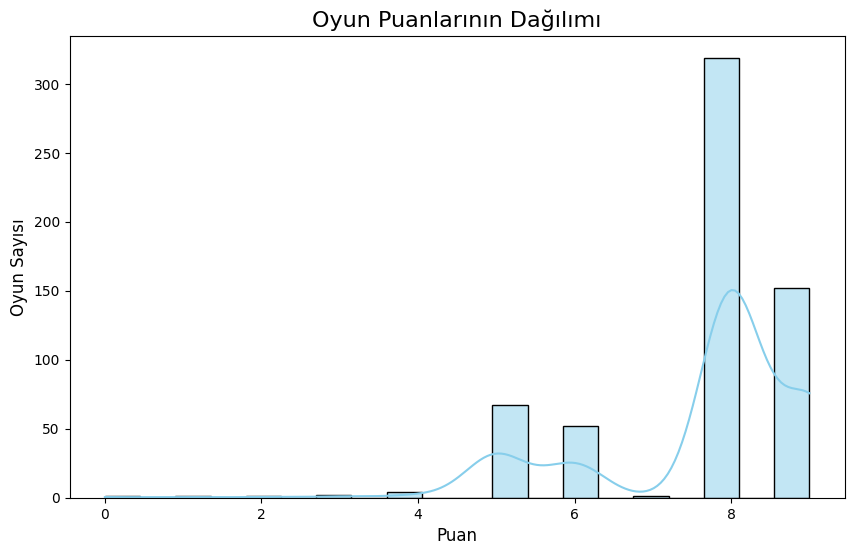

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(
    finaldfClear["overall_player_rating_number"], 
    bins=20, 
    kde=True, 
    color="skyblue"
)
plt.title("Oyun Puanlarının Dağılımı", fontsize=16)
plt.xlabel("Puan", fontsize=12)
plt.ylabel("Oyun Sayısı", fontsize=12)
plt.show()

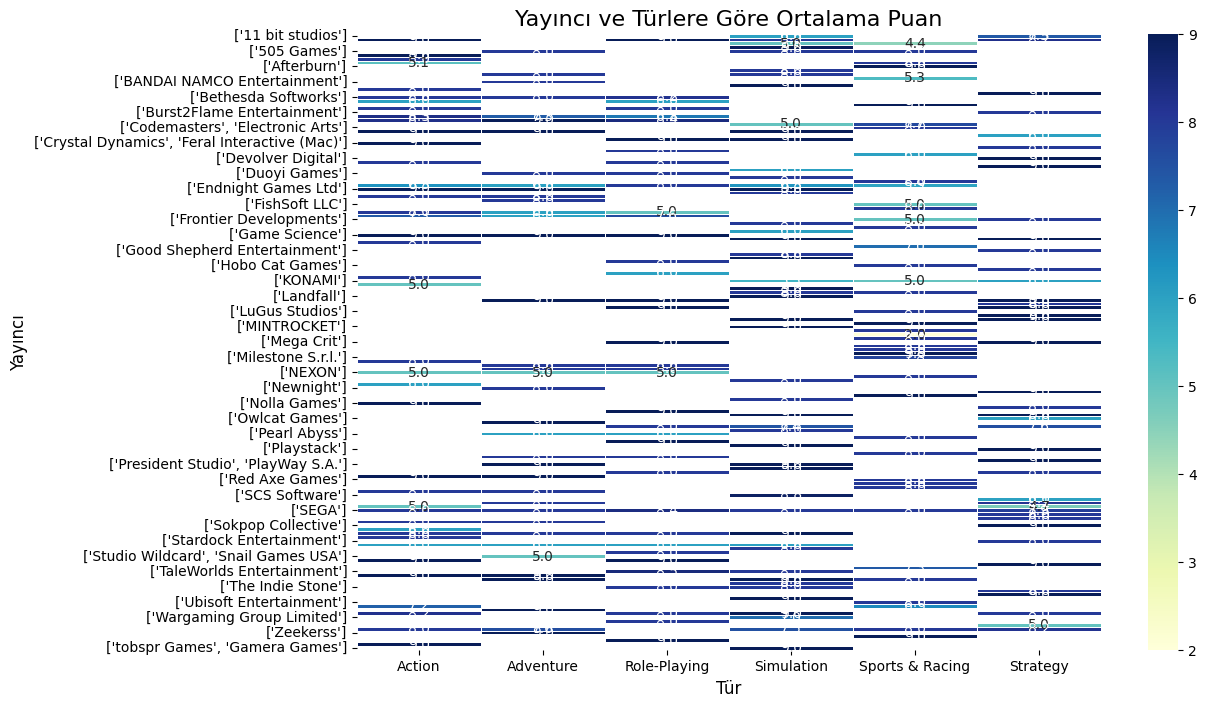

In [88]:
heatmap_data = finaldfClear.pivot_table(
    index="publisher", 
    columns="genre", 
    values="overall_player_rating_number", 
    aggfunc="mean"
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    cmap="YlGnBu", 
    annot=True, 
    fmt=".1f", 
    linewidths=.5
)
plt.title("Yayıncı ve Türlere Göre Ortalama Puan", fontsize=16)
plt.xlabel("Tür", fontsize=12)
plt.ylabel("Yayıncı", fontsize=12)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


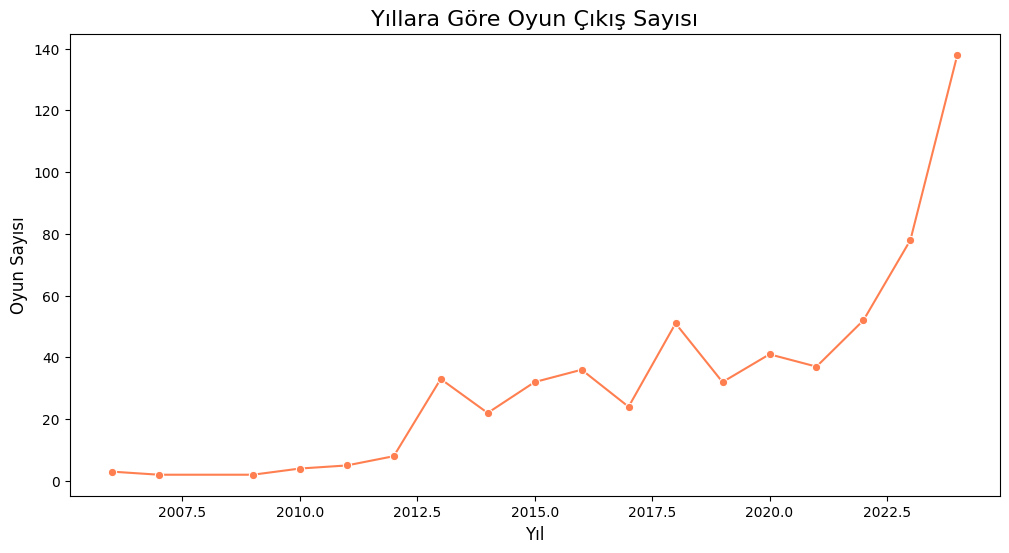

In [89]:
finaldfClear["release_year"] = pd.to_datetime(finaldfClear["release_date"]).dt.year

release_trend = finaldfClear["release_year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=release_trend.index, 
    y=release_trend.values, 
    marker="o", 
    color="coral"
)
plt.title("Yıllara Göre Oyun Çıkış Sayısı", fontsize=16)
plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Oyun Sayısı", fontsize=12)
plt.show()
